---------------------------------------------------------------------------------------
# **Datos electorales elecciones autonómicas Comunidad de Madrid 2023**
------------------------------------------------

Fuente datos: https://datos.comunidad.madrid/catalogo/organization/f483a299-1775-4d87-a2f7-39bf554735a1?tags=elecciones 

# Importación librerías 

In [291]:
import pandas as pd 
import chardet
import numpy as np
import seaborn as sns
import pprint
import matplotlib as plt
from collections import Counter
import matplotlib.pyplot as plt

# Lectura del Dataframe 

In [292]:
# Intentar leer el archivo CSV con la codificación detectada y delimitador especificado
try:
    # Especificar el delimitador (;) y la codificación (ISO-8859-1)
    madrid = pd.read_csv('datos_electorales_elecciones_autonomicas_comunidad_de_madrid_2023.csv', sep=';', encoding='ISO-8859-1')

    # Mostrar los primeros registros del DataFrame
    print("Primeros 5 registros:")
    display(madrid.head())

except Exception as e:
    display("Error al leer el archivo:", e)

Primeros 5 registros:


,cod_muni,Municipio,Distrito,Seccion,Mesa,Censo,Certif_alta,Certif_correc.,Electores,Votos_electores,...,ULEG,PH,PCTE,MM-VQ,CS,PACMA,FE DE LAS JONS,VOX,PODEMOS-IU-AV,PFE
0,1,La Acebeda,1,1,U,64,0,0,"64,0",54,...,0,0,0,6,0,0,0,1,6,0
1,2,Ajalvir,1,1,A,859,0,0,"859,0",554,...,1,0,1,105,9,0,0,57,13,0
2,2,Ajalvir,1,1,B,863,0,0,"863,0",543,...,0,0,1,92,5,6,4,53,13,2
3,2,Ajalvir,1,2,A,766,0,0,"766,0",561,...,0,0,0,98,9,5,3,71,13,0
4,2,Ajalvir,1,2,B,871,0,0,"871,0",624,...,0,0,0,100,4,6,1,79,7,0


In [293]:
madrid.columns

Index(['cod_muni', 'Municipio', 'Distrito', 'Seccion', 'Mesa', 'Censo',
       'Certif_alta', 'Certif_correc.', 'Electores', 'Votos_electores',
       'Votos_Interventores', 'Votos_blancos', 'Votos_nulos', 'Votos_total',
       'PP', 'PUM+J', 'PSOE', 'ULEG', 'PH', 'PCTE', 'MM-VQ', 'CS', 'PACMA',
       'FE DE LAS JONS', 'VOX', 'PODEMOS-IU-AV', 'PFE'],
      dtype='object')

### Creo una columna aleatoria con datos de la fecha de nacimiento de los votantes 

In [294]:
from datetime import datetime, timedelta

def generate_random_birthdate():
    today = datetime.today()
    min_age = 18
    max_age = 100
    random_days = np.random.randint(min_age * 365, max_age * 365)
    random_date = today - timedelta(days=random_days)
    return random_date.date()  # Devuelve solo la parte de fecha



In [295]:
madrid['Fecha_Nacimiento'] = madrid.apply(lambda row: generate_random_birthdate(), axis=1)

print("Primeros 5 registros con Fecha de Nacimiento aleatoria:")
display(madrid.head())


Primeros 5 registros con Fecha de Nacimiento aleatoria:


,cod_muni,Municipio,Distrito,Seccion,Mesa,Censo,Certif_alta,Certif_correc.,Electores,Votos_electores,...,PH,PCTE,MM-VQ,CS,PACMA,FE DE LAS JONS,VOX,PODEMOS-IU-AV,PFE,Fecha_Nacimiento
0,1,La Acebeda,1,1,U,64,0,0,"64,0",54,...,0,0,6,0,0,0,1,6,0,1946-07-30
1,2,Ajalvir,1,1,A,859,0,0,"859,0",554,...,0,1,105,9,0,0,57,13,0,1984-01-18
2,2,Ajalvir,1,1,B,863,0,0,"863,0",543,...,0,1,92,5,6,4,53,13,2,1979-02-11
3,2,Ajalvir,1,2,A,766,0,0,"766,0",561,...,0,0,98,9,5,3,71,13,0,1931-12-09
4,2,Ajalvir,1,2,B,871,0,0,"871,0",624,...,0,0,100,4,6,1,79,7,0,1932-09-08


# EDA (Exploratoy Data Analyst)

Columna	Tipo	Etiqueta	Descripción
`cod_muni`	numeric		
código municipio

`Municipio`	text		
municipio

`Distrito`	numeric		
distrito electoral

`Seccion`	numeric		
sección censal

`Mesa`	text		
mesa electoral

'Censo'	numeric		
censo inicial

`Certif_alta`	numeric		
certificados de alta realizados sobre el censo inicial

`Certif_correc.`	numeric		
certificados de correcciones sobre el censo inicial

`Electores`	text		
número de electores

'Votos_electores'	numeric		
número de votos electores (excluidos interventores)

`Votos_Interventores`	numeric		
número de votos interventores

'Votos_blancos'	numeric		
número de votos en blanco

`Votos_nulos`	numeric		
número de votos nulos

`Votos_total`	numeric		
numero de votos totales

`PP`	numeric		
número de votos a Partido Popular

`PUM+J`	numeric		
número de votos a Por un Mundo Más Justo

`PSOE`	numeric		
número de votos a Partido Socialista Obrero Español

`ULEG`	numeric		
número de votos a Unión por Leganés

`PH`	numeric		
número de votos a Partido Humanista

`PCTE`	numeric		
número de votos a Partido Comunista de los trabajadores de España

`MM-VQ`	numeric		
número de votos a Más Madrid-Verdes Equo

`CS`	numeric		
número de votos a Ciudadanos- Partido de la ciudadanía

`PACMA`	numeric		
número de votos a Partido Animalista con el Medio Ambiente

`FE DE LAS JONS`	numeric		
número de votos a Falange Española de la JONS

`VOX`	numeric		
número de votos a Vox

`PODEMOS-IU-AV`	numeric		
número de votos a Podemos-Izquierda Unida-Alianza Verde

`PFE`	numeric		
número de votos a Partido Feminista de España

In [296]:
madrid.columns
#Tengo la fecha de nacimiento para realizar el análisis. 

Index(['cod_muni', 'Municipio', 'Distrito', 'Seccion', 'Mesa', 'Censo',
       'Certif_alta', 'Certif_correc.', 'Electores', 'Votos_electores',
       'Votos_Interventores', 'Votos_blancos', 'Votos_nulos', 'Votos_total',
       'PP', 'PUM+J', 'PSOE', 'ULEG', 'PH', 'PCTE', 'MM-VQ', 'CS', 'PACMA',
       'FE DE LAS JONS', 'VOX', 'PODEMOS-IU-AV', 'PFE', 'Fecha_Nacimiento'],
      dtype='object')

In [297]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cod_muni             7170 non-null   int64 
 1   Municipio            7170 non-null   object
 2   Distrito             7170 non-null   int64 
 3   Seccion              7170 non-null   int64 
 4   Mesa                 7170 non-null   object
 5   Censo                7170 non-null   int64 
 6   Certif_alta          7170 non-null   int64 
 7   Certif_correc.       7170 non-null   int64 
 8   Electores            7170 non-null   object
 9   Votos_electores      7170 non-null   int64 
 10  Votos_Interventores  7170 non-null   int64 
 11  Votos_blancos        7170 non-null   int64 
 12  Votos_nulos          7170 non-null   int64 
 13  Votos_total          7170 non-null   int64 
 14  PP                   7170 non-null   int64 
 15  PUM+J                7170 non-null   int64 
 16  PSOE  

In [298]:
madrid.shape

(7170, 28)

In [299]:
madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
cod_muni,7170.0,91.555788,111.952349,1.0,74.00,79.0,79.75,990.0
Distrito,7170.0,6.819526,9.815969,1.0,1.00,4.0,10.00,99.0
Seccion,7170.0,44.633752,48.496865,1.0,8.00,25.0,67.00,222.0
Censo,7170.0,726.884937,579.075832,0.0,572.00,667.0,779.00,7495.0
Certif_alta,7170.0,0.024965,0.292304,0.0,0.00,0.0,0.00,10.0
Certif_correc.,7170.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Votos_electores,7170.0,475.870990,110.773793,0.0,395.00,468.0,548.00,912.0
Votos_Interventores,7170.0,0.254393,0.570829,0.0,0.00,0.0,0.00,5.0
Votos_blancos,7170.0,4.896374,3.110016,0.0,3.00,4.0,7.00,24.0
Votos_nulos,7170.0,4.789679,4.686501,0.0,2.00,4.0,6.00,105.0


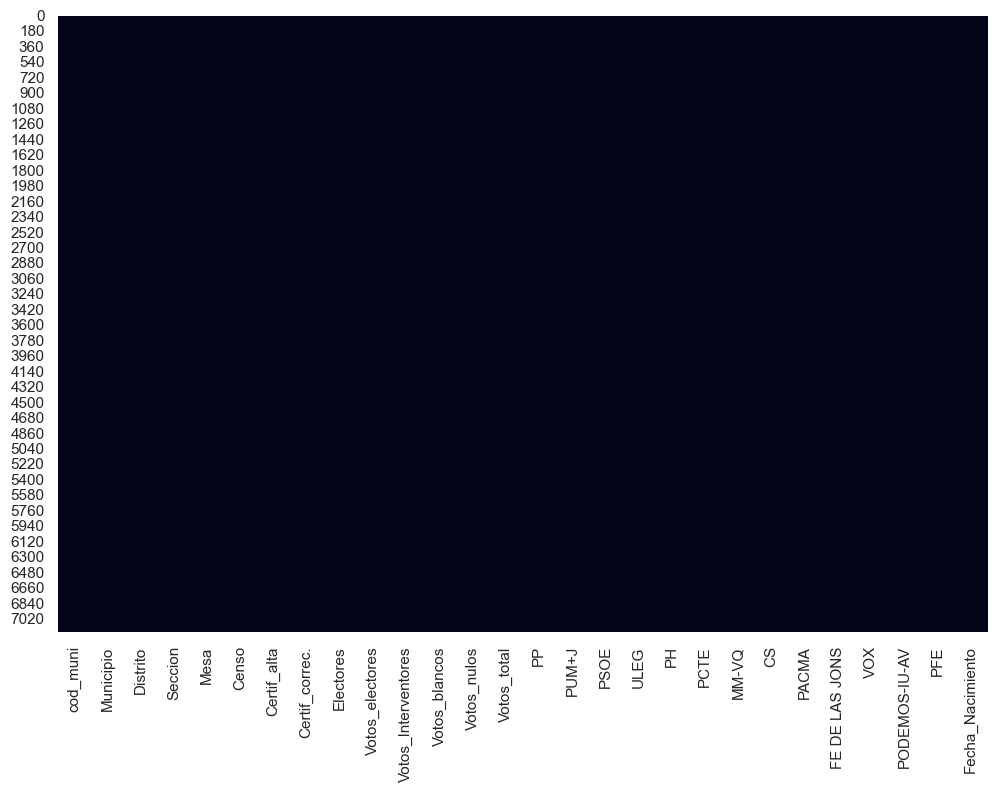

In [300]:
plt.figure(figsize=(12, 8))
sns.heatmap(madrid.isnull(), cbar=False)
plt.show()
#Comprobamos que el dataframe no tiene nulos. 

In [301]:
madrid.dtypes

cod_muni                int64
Municipio              object
Distrito                int64
Seccion                 int64
Mesa                   object
Censo                   int64
Certif_alta             int64
Certif_correc.          int64
Electores              object
Votos_electores         int64
Votos_Interventores     int64
Votos_blancos           int64
Votos_nulos             int64
Votos_total             int64
PP                      int64
PUM+J                   int64
PSOE                    int64
ULEG                    int64
PH                      int64
PCTE                    int64
MM-VQ                   int64
CS                      int64
PACMA                   int64
FE DE LAS JONS          int64
VOX                     int64
PODEMOS-IU-AV           int64
PFE                     int64
Fecha_Nacimiento       object
dtype: object

In [302]:
def calculate_age(birthdate):
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

madrid['Fecha_Nacimiento'] = pd.to_datetime(madrid['Fecha_Nacimiento'])

madrid['Edad'] = madrid['Fecha_Nacimiento'].apply(calculate_age)

print("Primeros 5 registros con Edad calculada:")
display(madrid.head().T)

Primeros 5 registros con Edad calculada:


,0,1,2,3,4
cod_muni,1,2,2,2,2
Municipio,La Acebeda,Ajalvir,Ajalvir,Ajalvir,Ajalvir
Distrito,1,1,1,1,1
Seccion,1,1,1,2,2
Mesa,U,A,B,A,B
Censo,64,859,863,766,871
Certif_alta,0,0,0,0,0
Certif_correc.,0,0,0,0,0
Electores,"64,0","859,0","863,0","766,0","871,0"
Votos_electores,54,554,543,561,624


---------------------------------
#  Ingeniería de características: Entidades numéricas de discretización
-----------------------------------

fuente: https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093d

La ingeniería de características se centra en el uso de las variables que ya están presentes en el conjunto de datos para crear características adicionales que sean (con suerte) mejores para representar la estructura subyacente de los datos.

Por ejemplo, el rendimiento del modelo puede beneficiarse de las características numéricas de discretización. Básicamente, esto significa dividir las características numéricas continuas u otras características numéricas en grupos distintos. Al aplicar el conocimiento del dominio, es posible que pueda diseñar categorías y características que enfaticen mejor las tendencias importantes en sus datos.

## Crea una nueva característica, , en función de la edad de una persona:

La condición que estamos verificando es si la persona tiene o no menos de 22 años de edad. Si están por debajo de ese umbral, devuelve un 1 porque esta fue la primera elección presidencial en la que fueron elegibles para votar. Si no es así, se devuelve 0. A partir de nuestra variable continua, hemos creado una nueva variable categórica binaria.np.where()Edad

In [303]:
madrid['primera_pres_elec'] = np.where(madrid['Edad']<22, 1, 0)

## Las personas mayores eran más o menos propensas a acudir a votar. 

Si es así, es posible que queramos llamar la atención de nuestro modelo sobre este umbral creando otro indicador de umbral:

In [304]:
madrid['senior'] = np.where(madrid['Edad']>=65, 1, 0)

In [305]:
madrid.dtypes

cod_muni                        int64
Municipio                      object
Distrito                        int64
Seccion                         int64
Mesa                           object
Censo                           int64
Certif_alta                     int64
Certif_correc.                  int64
Electores                      object
Votos_electores                 int64
Votos_Interventores             int64
Votos_blancos                   int64
Votos_nulos                     int64
Votos_total                     int64
PP                              int64
PUM+J                           int64
PSOE                            int64
ULEG                            int64
PH                              int64
PCTE                            int64
MM-VQ                           int64
CS                              int64
PACMA                           int64
FE DE LAS JONS                  int64
VOX                             int64
PODEMOS-IU-AV                   int64
PFE         

## Aplicación de una función personalizada con apply()

Podría tener sentido dividir a nuestros votantes registrados en generaciones en función de su año de nacimiento, ya que eso a menudo parece estar muy envuelto en la política de una persona. Una forma de hacerlo es escribir nuestra propia función personalizada delineando los límites para cada generación.

A continuación se muestra una forma en que podríamos escribir una función personalizada de este tipo:

In [306]:
def get_gen_grp(Fecha_Nacimiento):
    # Obtener el año actual
    year_today = datetime.now().year

    # Calcular la edad a partir de la fecha de nacimiento
    edad = year_today - Fecha_Nacimiento.year

    # Asignar una etiqueta de generación basada en la edad
    if edad < 46:
        return 'Greatest-Silent'
    elif 46 <= edad < 66:
        return 'Baby Boomers'
    elif 66 <= edad < 81:
        return 'Generation X'
    elif 81 <= edad < 97:
        return 'Millennials'
    else:
        return 'Generation Z'



In [307]:
madrid.head().T

,0,1,2,3,4
cod_muni,1,2,2,2,2
Municipio,La Acebeda,Ajalvir,Ajalvir,Ajalvir,Ajalvir
Distrito,1,1,1,1,1
Seccion,1,1,1,2,2
Mesa,U,A,B,A,B
Censo,64,859,863,766,871
Certif_alta,0,0,0,0,0
Certif_correc.,0,0,0,0,0
Electores,"64,0","859,0","863,0","766,0","871,0"
Votos_electores,54,554,543,561,624


Y luego usa Pandas para crear una nueva característica basada en la variable original:apply()Fecha_Nacimiento

In [308]:
madrid['Fecha_Nacimiento'] = pd.to_datetime(madrid['Fecha_Nacimiento'])

# Aplicar la función para obtener la generación y crear la columna 'generacion'
madrid['generacion'] = madrid['Fecha_Nacimiento'].apply(get_gen_grp)

# Mostrar los primeros registros para verificar
print("Primeros 5 registros con generación calculada:")
display(madrid.head().T)

Primeros 5 registros con generación calculada:


,0,1,2,3,4
cod_muni,1,2,2,2,2
Municipio,La Acebeda,Ajalvir,Ajalvir,Ajalvir,Ajalvir
Distrito,1,1,1,1,1
Seccion,1,1,1,2,2
Mesa,U,A,B,A,B
Censo,64,859,863,766,871
Certif_alta,0,0,0,0,0
Certif_correc.,0,0,0,0,0
Electores,"64,0","859,0","863,0","766,0","871,0"
Votos_electores,54,554,543,561,624


In [309]:
generation_distribution = madrid['generacion'].value_counts()


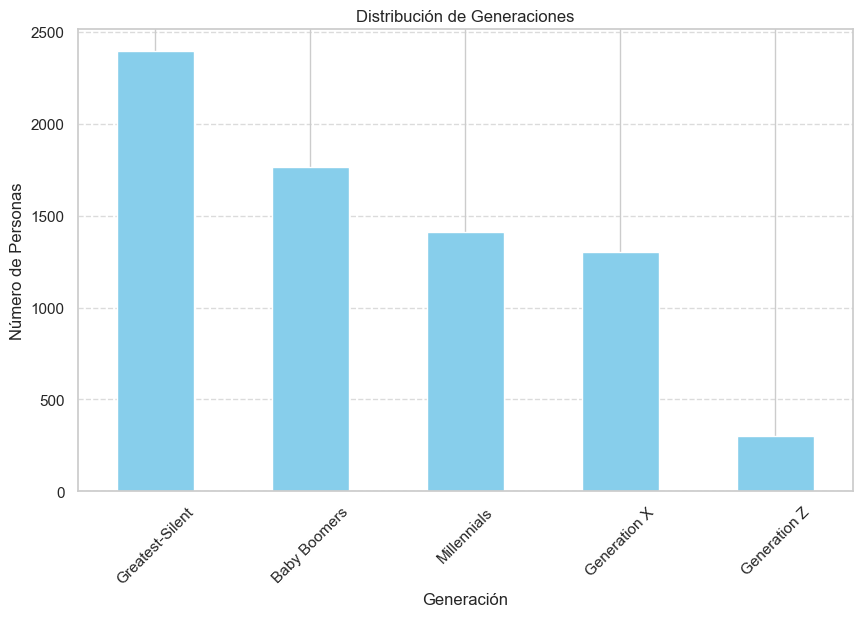

In [310]:
plt.figure(figsize=(10, 6))
generation_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Generaciones')
plt.xlabel('Generación')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Definición de bins con pd.cut()
También podemos crear los mismos contenedores de generación usando en lugar de escribir nuestra propia función y aplicarla. Todavía tendremos que definir las etiquetas apropiadas para cada grupo, así como los bordes de los contenedores (años de nacimiento cortados).pd.cut()

In [311]:
madrid.dtypes

cod_muni                        int64
Municipio                      object
Distrito                        int64
Seccion                         int64
Mesa                           object
Censo                           int64
Certif_alta                     int64
Certif_correc.                  int64
Electores                      object
Votos_electores                 int64
Votos_Interventores             int64
Votos_blancos                   int64
Votos_nulos                     int64
Votos_total                     int64
PP                              int64
PUM+J                           int64
PSOE                            int64
ULEG                            int64
PH                              int64
PCTE                            int64
MM-VQ                           int64
CS                              int64
PACMA                           int64
FE DE LAS JONS                  int64
VOX                             int64
PODEMOS-IU-AV                   int64
PFE         

In [312]:
madrid['Anio_Nacimiento'] = madrid['Fecha_Nacimiento'].dt.year


In [313]:
cut_labels = ['Greatest-Silent', 'Boomer', 'GenX', 'Millennial', 'GenZ']
cut_bins = [0, 1945, 1964, 1980, 1996, 2100]


In [314]:
madrid['cut_generation'] = pd.cut(madrid['Anio_Nacimiento'], bins=cut_bins, labels=cut_labels, right=False)

En la última línea, creamos nuestra nueva característica proporcionando la columna que queremos agrupar en categorías, las agrupaciones que queremos y cómo etiquetar cada categoría agrupada.pd.cut()

En lugar de agrupar por generación, podríamos crear rápidamente una gama y suministrarla como nuestros bordes de contenedor. Por ejemplo, si pensáramos que sería significativo agrupar la edad por década, podríamos lograrlo con lo siguiente:

In [315]:
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
madrid['cut_age'] = pd.cut(madrid['Edad'], bins=cut_bins)

In [316]:
madrid.head().T

,0,1,2,3,4
cod_muni,1,2,2,2,2
Municipio,La Acebeda,Ajalvir,Ajalvir,Ajalvir,Ajalvir
Distrito,1,1,1,1,1
Seccion,1,1,1,2,2
Mesa,U,A,B,A,B
Censo,64,859,863,766,871
Certif_alta,0,0,0,0,0
Certif_correc.,0,0,0,0,0
Electores,"64,0","859,0","863,0","766,0","871,0"
Votos_electores,54,554,543,561,624


In [317]:
cut_labels = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
madrid['cut_age'] = pd.cut(madrid['Edad'], bins=cut_bins, labels=cut_labels)

In [318]:
age_distribution = madrid['cut_age'].value_counts().sort_index()


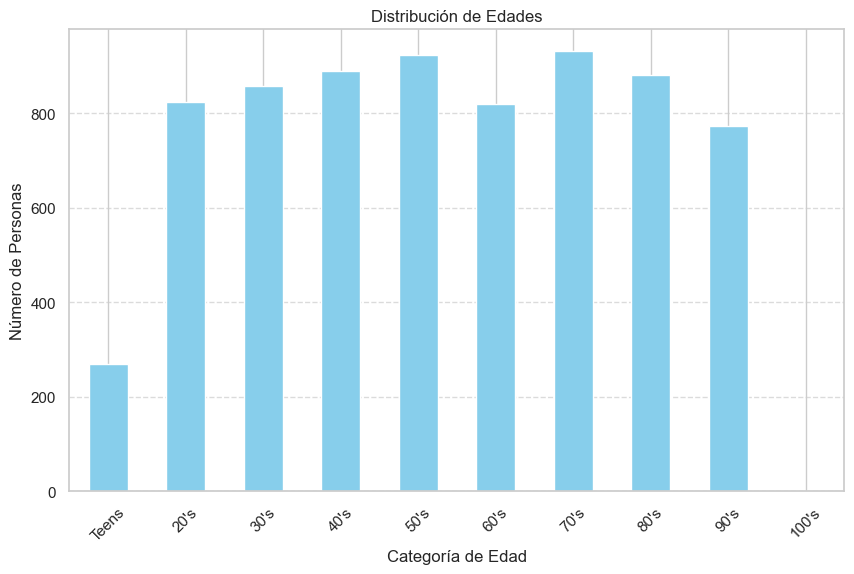

In [319]:
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [320]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cod_muni             7170 non-null   int64         
 1   Municipio            7170 non-null   object        
 2   Distrito             7170 non-null   int64         
 3   Seccion              7170 non-null   int64         
 4   Mesa                 7170 non-null   object        
 5   Censo                7170 non-null   int64         
 6   Certif_alta          7170 non-null   int64         
 7   Certif_correc.       7170 non-null   int64         
 8   Electores            7170 non-null   object        
 9   Votos_electores      7170 non-null   int64         
 10  Votos_Interventores  7170 non-null   int64         
 11  Votos_blancos        7170 non-null   int64         
 12  Votos_nulos          7170 non-null   int64         
 13  Votos_total          7170 non-nul

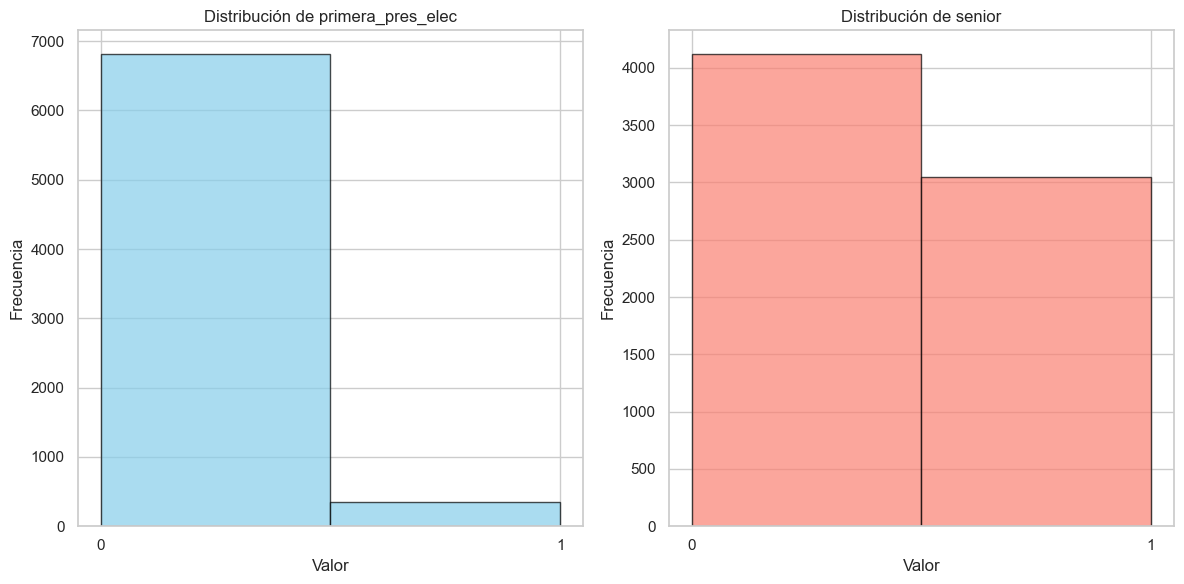

In [321]:
# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para primera_pres_elec
axs[0].hist(madrid['primera_pres_elec'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribución de primera_pres_elec')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')
axs[0].set_xticks([0, 1])

# Gráfico para senior
axs[1].hist(madrid['senior'], bins=2, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Distribución de senior')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xticks([0, 1])

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

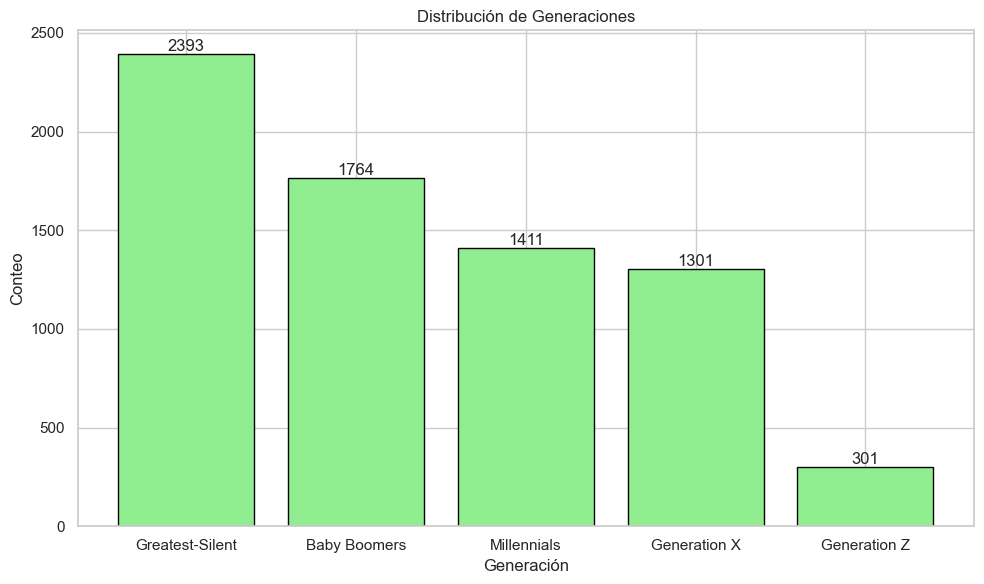

In [322]:
# Conteo de cada categoría
gen_counts = madrid['generacion'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(gen_counts.index, gen_counts.values, color='lightgreen', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de Generaciones')
plt.xlabel('Generación')
plt.ylabel('Conteo')

# Mostrar los valores en las barras
for bar, count in zip(bars, gen_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


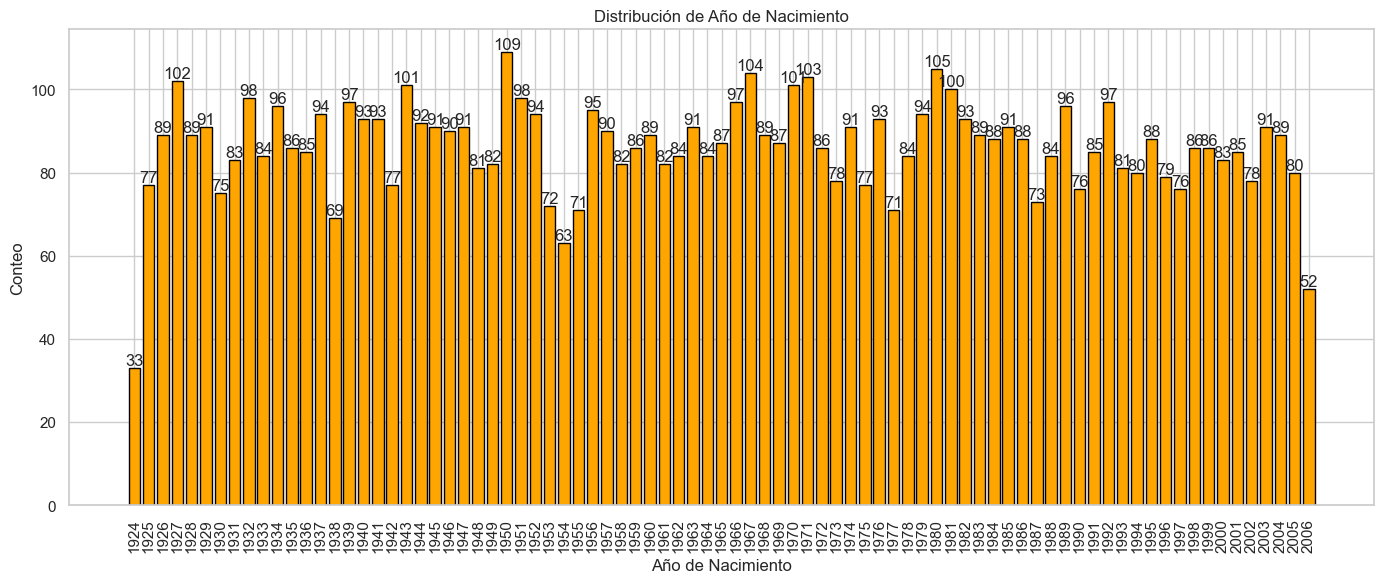

In [323]:
# Conteo de cada año de nacimiento
anio_counts = madrid['Anio_Nacimiento'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
bars = plt.bar(anio_counts.index.astype(str), anio_counts.values, color='orange', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de Año de Nacimiento')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Conteo')
plt.xticks(rotation=90)

# Mostrar los valores en las barras
for bar, count in zip(bars, anio_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


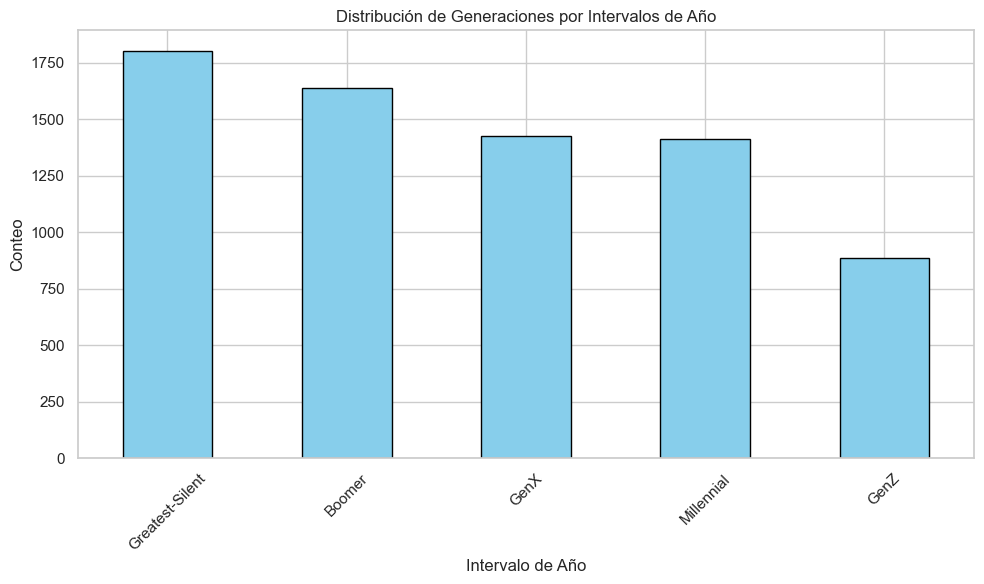

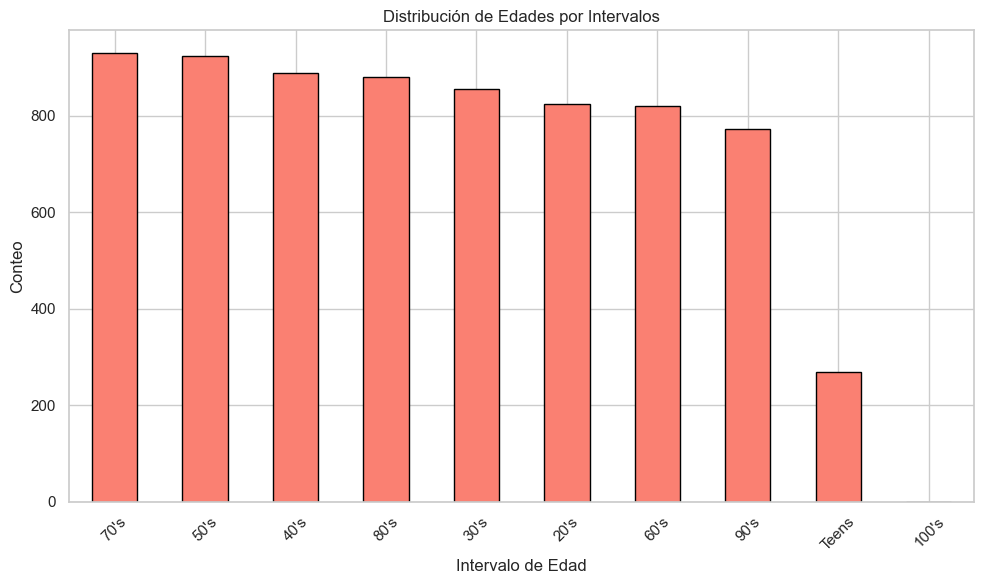

In [324]:
# Gráfico para cut_generation
plt.figure(figsize=(10, 6))
madrid['cut_generation'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Generaciones por Intervalos de Año')
plt.xlabel('Intervalo de Año')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para cut_age
plt.figure(figsize=(10, 6))
madrid['cut_age'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribución de Edades por Intervalos')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

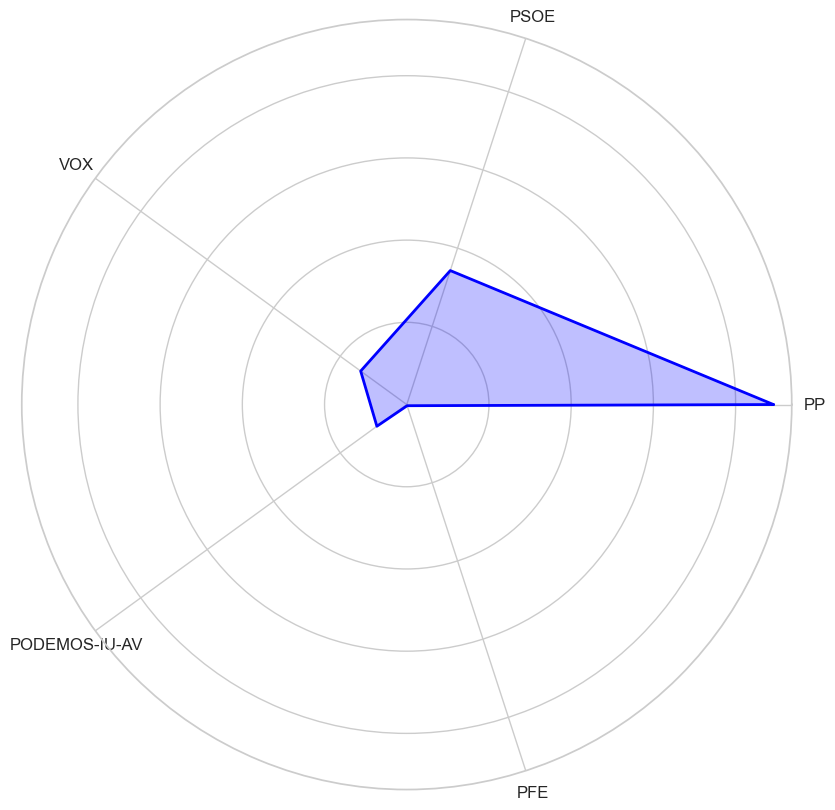

In [325]:
# Seleccionar las columnas para el gráfico de araña
columns_to_plot = ['PP', 'PSOE', 'VOX', 'PODEMOS-IU-AV', 'PFE']

# Calcular el promedio de cada columna
values = madrid[columns_to_plot].mean().values

# Crear un dataframe temporal para los valores
df_radar = pd.DataFrame({
    'columnas': columns_to_plot,
    'valores': values
})

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Configurar el número de ejes y el ángulo
num_columns = len(df_radar)
angles = np.linspace(0, 2 * np.pi, num_columns, endpoint=False).tolist()

# Hacer que el gráfico sea circular
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

# Crear el gráfico de araña
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_radar['columnas'], fontsize=12)

# Mostrar el gráfico
plt.show()

----------------------
# **Ejemplos de ingeniería de características: Agrupación en bins de características categóricas**
------------------

Cómo usar NumPy o Pandas para agrupar rápidamente características categórica.


Trabajar con datos categóricos con fines de aprendizaje automático (ML) a veces puede presentar problemas complicados. En última instancia, estas características deben codificarse numéricamente de alguna manera para que un algoritmo de aprendizaje automático pueda trabajar con ellas.

También querrá considerar métodos adicionales para preparar las características categóricas para el modelado. Por ejemplo, el rendimiento del modelo puede beneficiarse de la discretización de entidades categóricas. Básicamente, esto significa agrupar varias categorías en una sola categoría. Al aplicar el conocimiento del dominio, es posible que pueda diseñar nuevas categorías y características que representen mejor la estructura de los datos.

En esta publicación, cubriremos brevemente por qué las características categóricas de agrupación en binning pueden ser beneficiosas. A continuación, recorreremos tres métodos diferentes para agrupar características categóricas con ejemplos específicos utilizando NumPy y Pandas.


## ¿Por qué las categorías de contenedores?
Con las características categóricas, es posible que encuentre problemas con etiquetas raras, categorías o grupos que son extremadamente poco comunes dentro de su conjunto de datos. Este problema a menudo está relacionado con características que tienen una cardinalidad alta, en otras palabras, muchas categorías diferentes.

Tener demasiadas categorías, y especialmente categorías raras, conduce a un conjunto de datos ruidoso. Puede ser difícil para un algoritmo de ML eliminar este ruido y aprender de las señales más significativas de los datos.

La alta cardinalidad también puede exacerbar la maldición de la dimensionalidad si elige codificar en caliente sus características categóricas. Si la variable original tiene 50 categorías diferentes, básicamente está agregando 49 columnas a su conjunto de datos.

Tener demasiadas categorías también puede dar lugar a problemas a la hora de entrenar y probar el modelo. Es muy posible que una categoría aparezca en el conjunto de pruebas, pero no en el conjunto de entrenamiento. Su modelo no tendría idea de cómo manejar esa categoría porque nunca la ha "visto" antes.

Una forma de abordar estos problemas es mediante la ingeniería de nuevas características que tengan menos categorías. Esto se puede lograr mediante la agrupación en discretización (agrupación) de varias categorías en una sola categoría.

En los siguientes ejemplos, exploraremos y diseñaremos características a partir de un conjunto de datos con información sobre la demografía y la participación de los votantes. He seleccionado 3 variables categóricas para trabajar:

In [326]:
madrid.head().T

,0,1,2,3,4
cod_muni,1,2,2,2,2
Municipio,La Acebeda,Ajalvir,Ajalvir,Ajalvir,Ajalvir
Distrito,1,1,1,1,1
Seccion,1,1,1,2,2
Mesa,U,A,B,A,B
Censo,64,859,863,766,871
Certif_alta,0,0,0,0,0
Certif_correc.,0,0,0,0,0
Electores,"64,0","859,0","863,0","766,0","871,0"
Votos_electores,54,554,543,561,624


In [327]:
df_categorico = madrid[['Municipio', 'Mesa', 'Distrito']]
df_categorico


,Municipio,Mesa,Distrito
0,La Acebeda,U,1
1,Ajalvir,A,1
2,Ajalvir,B,1
3,Ajalvir,A,1
4,Ajalvir,B,1
...,...,...,...
7165,Residentes ausentes-Madrid,U,99
7166,Residentes ausentes-Madrid,U,99
7167,Residentes ausentes-Madrid,U,99
7168,Residentes ausentes-Madrid,U,99


In [328]:
df_categorico.describe()

,Distrito
count,7170.000000
mean,6.819526
std,9.815969
min,1.000000
25%,1.000000
50%,4.000000
75%,10.000000
max,99.000000


In [329]:
df_categorico['Municipio'].value_counts()

Municipio
Madrid                 3478
Móstoles                224
Leganés                 207
Alcalá de Henares       205
Fuenlabrada             204
                       ... 
La Serna del Monte        1
Somosierra                1
Estremera                 1
Cervera de Buitrago       1
La Acebeda                1
Name: count, Length: 180, dtype: int64

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20224\3901778088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Municipio', y='Conteo', data=df_top_10_municipios, palette='viridis')


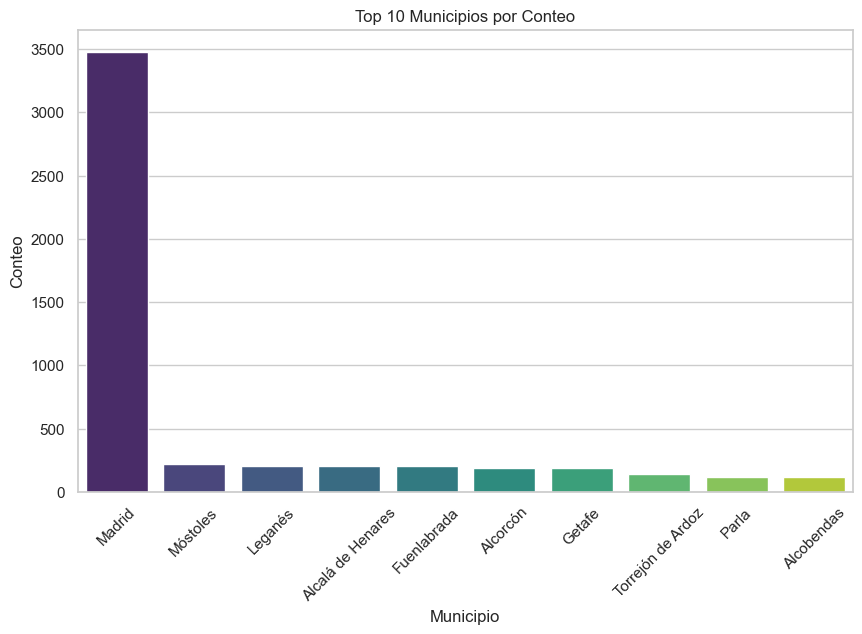

In [330]:
top_10_municipios = df_categorico['Municipio'].value_counts().head(10)


df_top_10_municipios = top_10_municipios.reset_index()
df_top_10_municipios.columns = ['Municipio', 'Conteo']


plt.figure(figsize=(10, 6))
sns.barplot(x='Municipio', y='Conteo', data=df_top_10_municipios, palette='viridis')

plt.title('Top 10 Municipios por Conteo')
plt.xlabel('Municipio')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

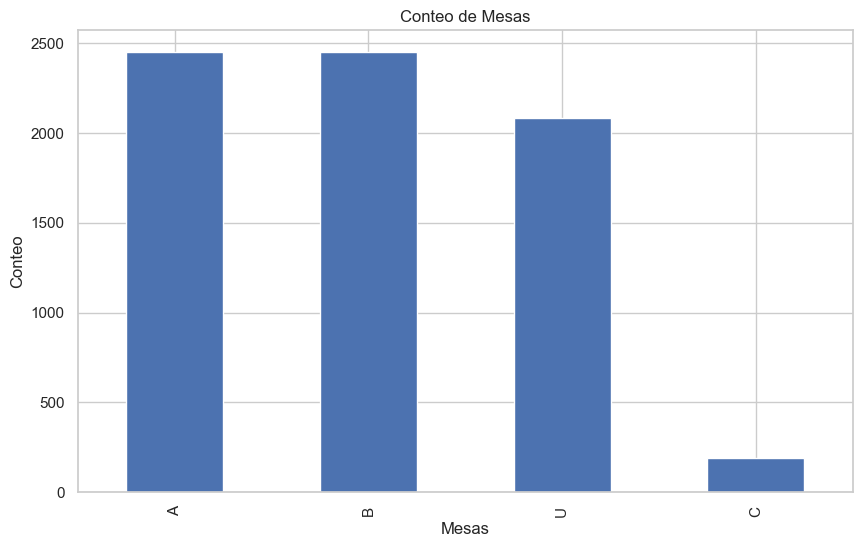

In [331]:
conteo_mesas = df_categorico['Mesa'].value_counts()

plt.figure(figsize=(10, 6))
conteo_mesas.plot(kind='bar')

plt.title('Conteo de Mesas')
plt.xlabel('Mesas')
plt.ylabel('Conteo')
plt.show()

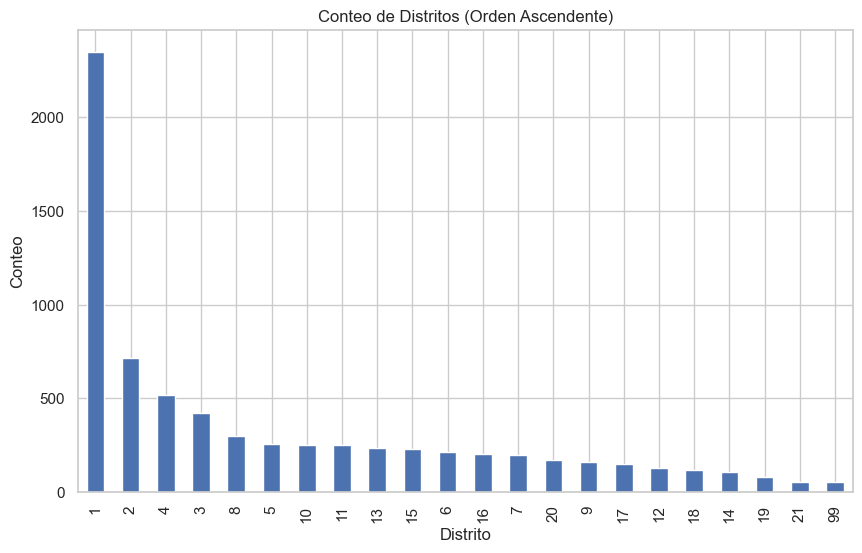

In [332]:
conteo_distritos = df_categorico['Distrito'].value_counts(ascending=False)

plt.figure(figsize=(10, 6))
conteo_distritos.plot(kind='bar')

plt.title('Conteo de Distritos (Orden Ascendente)')
plt.xlabel('Distrito')
plt.ylabel('Conteo')

plt.xticks(rotation=90)

plt.show()

## Uso de np.where() para agrupar categorías

In [340]:
distrito_1 = df_categorico[df_categorico['Distrito'] == 1]
distrito_2_60 = df_categorico[(df_categorico['Distrito'] >= 2) & (df_categorico['Distrito'] <= 60)]
distrito_60_100 = df_categorico[(df_categorico['Distrito'] >= 60) & (df_categorico['Distrito'] <= 100)]

In [342]:
df_categorico['distritos_segmentados'] = np.where(df_categorico['Distrito'] == 1, 'distrito_1',
                                         np.where(
                                             (df_categorico['Distrito'] >= 2) & 
                                             (df_categorico['Distrito'] <= 60), 'distrito_2_60',
                                         np.where(
                                             (df_categorico['Distrito'] >= 60) & 
                                             (df_categorico['Distrito'] <= 100), 'distrito_60_100',
                                        'otros')))

# Mostrar los primeros registros del DataFrame resultante
display(df_categorico.head())

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20224\3820188574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorico['distritos_segmentados'] = np.where(df_categorico['Distrito'] == 1, 'distrito_1',


,Municipio,Mesa,Distrito,distritos_segmentados
0,La Acebeda,U,1,distrito_1
1,Ajalvir,A,1,distrito_1
2,Ajalvir,B,1,distrito_1
3,Ajalvir,A,1,distrito_1
4,Ajalvir,B,1,distrito_1


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20224\4110431459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distritos_segmentados', y='Conteo', data=df_conteo_dist_segmentados, palette='viridis')


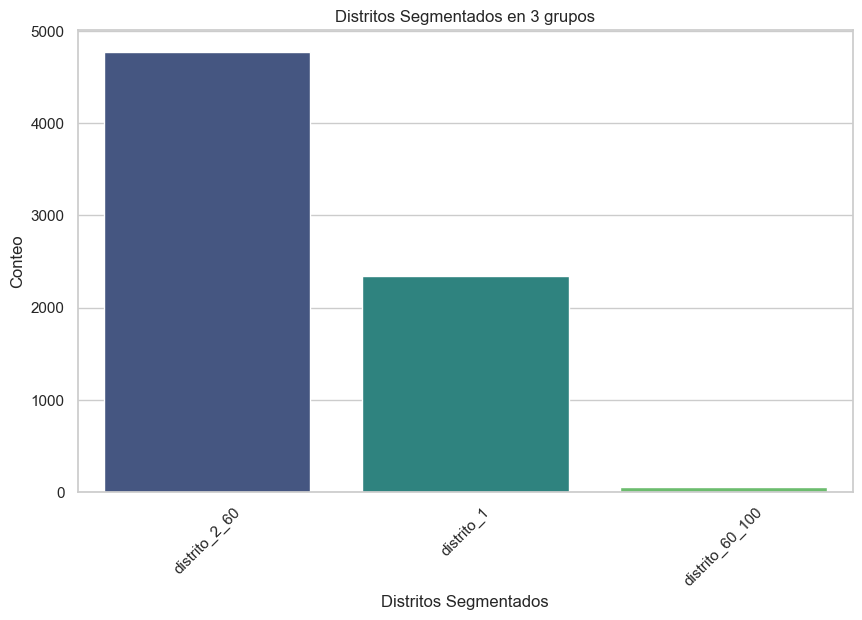

In [343]:
conteo_dist_segmentados = df_categorico['distritos_segmentados'].value_counts()


df_conteo_dist_segmentados = conteo_dist_segmentados.reset_index()
df_conteo_dist_segmentados.columns = ['distritos_segmentados', 'Conteo']


plt.figure(figsize=(10, 6))
sns.barplot(x='distritos_segmentados', y='Conteo', data=df_conteo_dist_segmentados, palette='viridis')

plt.title('Distritos Segmentados en 3 grupos')
plt.xlabel('Distritos Segmentados')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

In [350]:
#Creo datos aleatorios de Zonas 
zonas_aleatorias = np.random.choice(['norte', 'sur', 'este', 'oeste'], size=len(df_categorico))

df_categorico['ZONAS'] = zonas_aleatorias

display(df_categorico) 

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20224\3768349147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorico['ZONAS'] = zonas_aleatorias


,Municipio,Mesa,Distrito,distritos_segmentados,ZONAS
0,La Acebeda,U,1,distrito_1,oeste
1,Ajalvir,A,1,distrito_1,sur
2,Ajalvir,B,1,distrito_1,sur
3,Ajalvir,A,1,distrito_1,norte
4,Ajalvir,B,1,distrito_1,oeste
...,...,...,...,...,...
7165,Residentes ausentes-Madrid,U,99,distrito_60_100,norte
7166,Residentes ausentes-Madrid,U,99,distrito_60_100,sur
7167,Residentes ausentes-Madrid,U,99,distrito_60_100,oeste
7168,Residentes ausentes-Madrid,U,99,distrito_60_100,este


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20224\4154439989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ZONAS', data=df_categorico, palette='viridis')


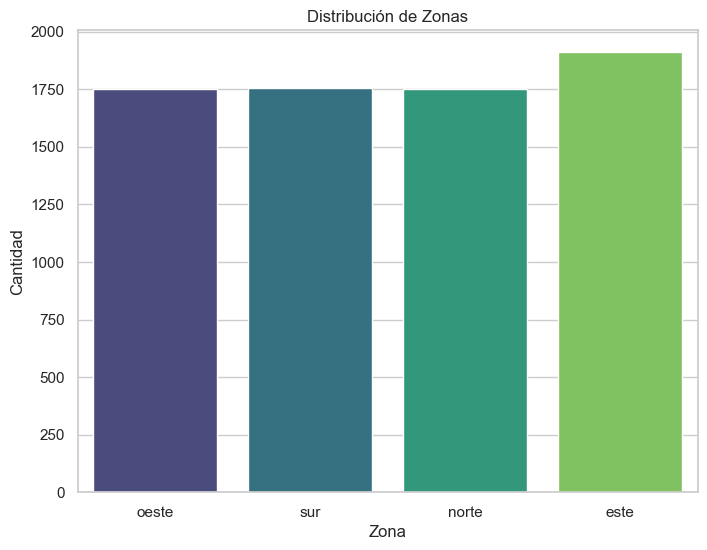

In [351]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ZONAS', data=df_categorico, palette='viridis')

plt.title('Distribución de Zonas')
plt.xlabel('Zona')
plt.ylabel('Cantidad')


plt.show()